In [1]:
%matplotlib inline
import numpy as np
from figures import er_replay_capacity as fig_1

### Replay capacity analysis

How many different sequences can a network reliably replay? Mathematically, this is equivalent to asking how many sequences can be specified purely through an unordered *set* of involved ensembles (marked by lingering hyperexcitability), and through the first ensemble in the sequence. This so-called replay capacity will of course depend on the network architecture. In this analysis, we restrict our analysis to networks with binary, directed connections.

Importantly, there should be a nontrivial connectivity matrix that maximizes the replay capacity of a network. If the network has no connections, no sequences can be specified by a set of hyperexcitable ensembles: after the first ensemble activates, all other hyperexcitable ensembles will activate with equal probability, since none of them receives input from the first ensemble. On the other hand, no sequences can be specified in a fully connected network either, since after the first ensemble activates, again all other hyperexcitable ensembles will activate with equal probability, since they always receive increased but equal input from the first ensemble.

Here we quantify the replay capacity of networks with a variety of different connectivities. To perform this calculation we precisely define the replay capacity of a network to be the number of replayable sequences it contains, where we call a sequence of ensembles replayable if the following is true:

Given the first ensemble, only one possible path through the *set* of the later ensembles can be traced by following the connections present in the network.

This simply quantifies the notion that if one knows the *set* of ensembles in the sequence as well as the starting ensemble, then there should be no ambiguity in determining the order. For example:

<img src="files/images/reliable_replayability_example.png" />

We define the *replay capacity* $R_L(C)$ of a network given its connectivity structure (a binarized version of its weight matrix) as the number of reliably replayable sequences of length $L$ that exist in the network. Specifically:

$$R_L(C) = \sum_\limits{path \in \{ \textrm{paths of length } L \} } \mathbb{1}[path \textrm{ is reliably replayable }].$$


Notably $R_L(C) = 0$ when $C$ is completely unconnected (because there are no paths to sum over) and when $C$ is fully connected (because all paths have some ambiguity).

For a given random network, one can calculate $E[R_L(C)]$ in the following way:

$$E[R_L(C)] = E\left[\sum_{i, j} n_R^L(i, j) \right] = 
\sum_{i, j} E\left[n_R^L(i, j)\right] =
N(N-1) E\left[n_R^L(i, j \neq i)\right] + N E\left[n_R^L(i, i)\right] $$

where $n_R^L(i, j)$ is the number of reliably replayable paths that start at $i$ and end at $j$. Thus, one only needs to calculate the expected number of paths between two randomly chosen ensembles (both when those ensembles are distinct and the same). 

In certain cases the following further simplification is also useful:

$$E\left[n_R^L(i, j \neq i)\right] = E\left[ \sum_{k_1, ..., k_{L - 2} \notin \{i, j\} } \mathbb{1} \left[ \exists \textrm{ RR path } (i, k_1, ..., k_{L-2}, j) \right] \right]$$

$$ = \sum_{k_1, ..., k_{L - 2} \notin \{i, j\} } E\left[ \mathbb{1} \left[ \exists \textrm{ RR path } (i, k_1, ..., k_{L-2}, j) \right] \right]$$

$$ = \cfrac{(N - 1 - \mathbb{1}[i \neq j])!}{(N - L + 1 - \mathbb{1}[i \neq j])!} P \left( \exists \textrm{ RR path } (i, k_1, ..., k_{L-2}, j) \right)$$

Where "RR" stands for "reliably replayable" and in the summation $k_1, ..., k_{L - 2}$ must be unique (i.e., we include only simple paths, since all nonsimple paths are not RR). 

Thus, one actually only needs to know the probability that a single randomly chosen length $L$ sequence has a reliably replayable path through it. In general this equals the probability that there is a path through that sequence multiplied by the probability that no ensemble besides the last one has more than one downstream connection to another ensemble in the sequence.

#### Erdos-Renyi (random) network
We first consider a network of ensembles, in which a directed connection between any pair of ensembles is present with probability $p$. For this network, we have:

$$P \left( \exists \textrm{ RR path } (i, k_1, ..., k_{L-2}, j) \right) = p^{L - 1}(1 - p)^{(L - 1)(L - 3 + \mathbb{1}[i \neq j])}$$

#### Fixed out-degree network
We next consider a network in which each ensemble connects randomly to a fixed number $m$ of other ensembles. Then:

$$P \left( \exists \textrm{ RR path } (i, k_1, ..., k_{L-2}, j) \right) = \left( 1 - \cfrac{N - m - 1}{N - 1} \right)^{L - 1}
\left( \cfrac{(N - L)!}{(N - 2)!} \cfrac{(N - m - 1)!}{(N - L - m + \mathbb{1}[i \neq j])!} \right)^{L - 1}$$

#### Fixed in-degree network

We then consider a network in which each ensemble randomly receives connections from a fixed number $k$ of other ensembles.

#### Random sequence network

Here we consider a network containing $n$ random directed paths of length $L$.

#### Circular feed-forward network
Here we consider a feed forward network of $l$ layers in which each ensemble in each layer connects to all of the ensembles in the subsequent layer, and in which all of the ensembles in the final layer connect to all of the ensembles in the first layer.

In [4]:
CONFIG = {
    'PS': np.linspace(0, 1, 100),
    'LS': range(3, 10),
    'FIG_SIZE': (10, 5),
    'COLORS': [
        (0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (.5, .5, 0),
        (.5, 0, .5), (0, .5, .5)],
    'FONT_SIZE': 16,
}

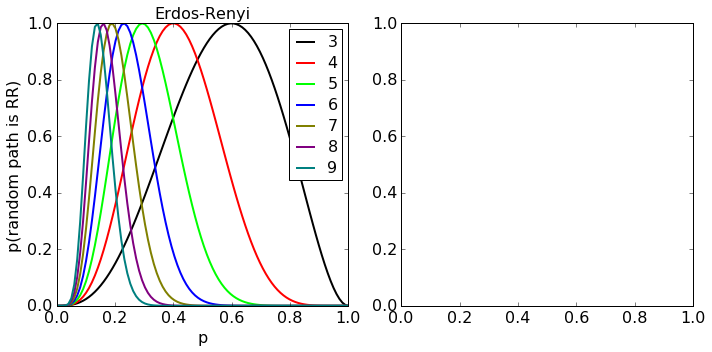

In [5]:
fig_1(**CONFIG)